In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class WeightedGraphWithHeuristic:
  def __init__(self):
    self.all_nodes = {}
    self.all_nodes.clear()
    self.start_end = []

  def addNode(self, name, color, adj_nodes_with_cost):
    node_content = {}
    node_content["color"] = color
    node_content.update(adj_nodes_with_cost)
    self.all_nodes[name] = node_content

  def addHeuristic(self):
    for key in self.all_nodes:
      self.all_nodes[key]["h_val"] = self.calculateNearest(key)
      #makes gray unlikely to go onto
      if self.all_nodes[key]['color'] == "gray": self.all_nodes[key]["h_val"] = self.all_nodes[key]["h_val"] + 1
      #makes green definitely likely to go onto
      elif self.all_nodes[key]['color'] == "green": self.all_nodes[key]["h_val"] = self.all_nodes[key]["h_val"] - 2
      elif self.all_nodes[key]['color'] == "lblue": self.all_nodes[key]["h_val"] = self.all_nodes[key]["h_val"] - 1
      elif self.all_nodes[key]['color'] == "dblue": self.all_nodes[key]["h_val"] = self.all_nodes[key]["h_val"] - 1
  #creates a list that stores the start node, checkpoint nodes, and end node

  def addStartEnd(self, route):
    self.start_end.clear()
    self.start_end.append(route[0])
    self.start_end.append(route[1])
    self.addHeuristic()

  #calculates the nearest of the checkpoint nodes
  def calculateNearest(self, current_node):
    distance_to_end = self.calculateVertical(current_node, self.start_end[1]) + self.calculateHorizontal(current_node, self.start_end[1])
    return distance_to_end

  #calculates the vertical distance between 2 nodes
  def calculateVertical(self, begin, finish):
    lis = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
    begin = begin.replace(begin[0], "", 1)
    finish = finish.replace(finish[0], "", 1)

    if ((lis.index(finish) > 6) and (lis.index(begin) < 6)
    or (lis.index(finish) < 6) and (lis.index(begin) > 6)):
      adj_val = abs(lis.index(begin) - 6)
      return abs(lis.index(finish) - lis.index(begin)) + adj_val
    else:
      return abs(lis.index(finish) - lis.index(begin))

  #calculates the horizontal distance between 2 nodes
  def calculateHorizontal(self, begin, finish):
    lis = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"]
    if ((lis.index(finish[0]) > 5) and (lis.index(begin[0]) < 5)
    or (lis.index(finish[0]) < 5) and (lis.index(begin[0]) > 5)):
      adj_val = abs(lis.index(begin[0]) - 5)
      return abs(lis.index(begin[0]) - lis.index(finish[0])) + adj_val
    else:
      return abs(lis.index(begin[0]) - lis.index(finish[0]))

  def getAllNodes(self):
    return self.all_nodes

  def plotWeightedGraphWithHeuristic(self, route):
    G = nx.MultiGraph()
    G.add_nodes_from(route)
    for i in range(len(route)-1):
      G.add_edge(route[i], route[i+1])

    pos = nx.spring_layout(G)
    #draw
    plt.axis("off")
    #plt.tight_layout()

    nx.draw(G)
    plt.draw()


In [2]:
class AStarBestFirstSearch:
  def __init__(self):
    self.all_nodes = dict()
    next_node_name = ''

  def getAllNodes(self):
    print(self.all_nodes)
    return self.all_nodes

  #  Algorithm:
  # set start node as current node
  # loop:
  #   get the adjacent node with lowest heuristic of current node
  #   move to that node

  def greedyAStarSearch(self, graph, route):
    path = []
    min_elem = []
    path_cost = 0
    visited = dict()
    exp_set = dict()
    self.all_nodes.clear()
    loop_count = 0
    print("Sample Greedy Best First Search Starts")
    print("===========================================")
    #finds the route from the first point to the next point
    while len(route) > 1:
      graph.addStartEnd(route)
      print('Finding Route')
      next_node_name = route.pop(0)
      target_name = route[0]
      self.all_nodes = graph.getAllNodes()
      visited.clear()
      #set the target node to an extremely low h_val
      self.all_nodes[target_name]['h_val'] = 0
      target_found = False
      while target_found == False:
        #clears the possible path to focus on the paths from the next node
        exp_set.clear()
        #creates a list that tracks the path
        path.append(next_node_name)
        #places the next node to be expanded in visited
        path_cost = path_cost + self.all_nodes[next_node_name]['h_val']
        visited[next_node_name] = [path_cost, path.copy()]
        loop_count += 1
        #checks for target node
        if next_node_name == target_name:
          print('target node found')
          print(path)
          path.append('checkpoint')
          target_found = True
          continue
          #expand the next node that has been established
        for key in self.all_nodes[next_node_name]:
          if (key != 'h_val' and key != 'color'
          and key not in visited.keys()):
            #add to the set of paths that are possible to take, looking for the smallest
            path.append(key)
            #add new node to the expanded set
            exp_set[key] = [self.all_nodes[next_node_name][key] + path_cost + self.all_nodes[key]['h_val'], path.copy()]
            path.pop()
        #checks that there are still paths to take. if not then the node wasnt found
        if len(list(exp_set.keys())) == 0:
          print('dead end')
          return
        else:
          final_choice = False
          while final_choice == False:
            #finds the node with the least cost from the expanded paths
            min_elem.clear()
            min_elem.append(list(exp_set.keys())[0])
            min_elem.append(exp_set[min_elem[0]][0])
            for key in exp_set:
              if exp_set[key][0] <= min_elem[1]:
                min_elem[0] = key
                min_elem[1] = exp_set[key][0]
            #checks if this node has already been visited,
            if min_elem[0] not in visited.keys():
              next_node_name = min_elem[0]
              exp_set.pop(min_elem[0])
              final_choice = True
            else:
              print('Node already been visited')
              exp_set.pop(min_elem[0])
    else:
      print('All checkpoints have been reached')
      print('The cost of the path in total was: ' + str(path_cost) + '\n')
      return path.copy()


In [3]:
from typing import ItemsView
import networkx as nx
import pprint

class SampleUCS:
  def __init__(self):
    self.SampleGraph = nx.Graph() #creates a graph that weighted edges can be added to
    self.p_queue = []  # store as (node_name, path, cost)
    self.visited = {}

  def addEdges(self, edge_list):
    self.SampleGraph.add_weighted_edges_from(edge_list)

  def showGraph(self):
    nx.draw(self.SampleGraph)
    plt.show()

  def getEdgeCost(self,start_node,end_node): # store as {node_name: {path:, cost:,}}
    if end_node not in self.all_nodes[start_node]:
      print("edge does not exist!")
      return -1
    return self.all_nodes[start_node][end_node]

  def isVisited(self, node_name):
    for curr_node in self.visited:
      if curr_node == node_name:
        return True
    return False

  # helper function to determine if a node does p_queue need update
  #   return -2 if not in p_queue, -1 if in queue but no need to change,
  #   return p_queue index of data need to change otherwise
  def shouldUpdatePQueue(self, new_data):
    return_val = -2           # default return val is -2: not in queue
    for i in range(len(self.p_queue)): # check if node is in p_queue
      curr_data = self.p_queue[i]
      if new_data[0] != curr_data[0]: # do nothing if name not match
        continue
      # if name match (in queue), check path cost
      print("------ a node already in p_queue is an adj_node")
      curr_path_cost = curr_data[2]
      new_path_cost = new_data[2]
      print("------ curr path cost: " + str(curr_data[2]) + " |   | new path cost: " + str(new_data[2]))
      if curr_path_cost > new_path_cost: # indicate to update only when new path cost is lower
        return_val = i
        print("------ need to update data bc new data has lower cost than existing data at index " + str(i))
        print("------ new data: "+ str(new_data) + " |  | curr data: " + str(curr_data))
      else:                 # no need to update if new path has higher cost
        return_val = -1
        print("------ no need to update node bc new data has higher or same cost")
    return return_val


  def expandNode(self,exp_node):
    for curr_adj_node in self.all_nodes[exp_node]:  #loop through p_que and visited to check if exist
      new_path = self.visited[exp_node]["path"] + ", " + curr_adj_node  # new path is curr path + curr_adj_node
      new_cost = self.getEdgeCost(exp_node,curr_adj_node) + self.visited[exp_node]["path_cost"] # new cost is curr path_cost + edge cost
      data_to_add = (curr_adj_node, new_path, new_cost)
      print("---new path is: "+ str(new_path))
      print("---new cost is: "+ str(new_cost))
      print("---new data to add is:" + str(data_to_add))

      add_switch = True
      if self.isVisited(curr_adj_node): # check if visited
        add_switch = False      # if already in visited, do not add
        print("-path not added bc already visited")

      update_indicator = self.shouldUpdatePQueue(data_to_add)
      if update_indicator >= -1:   # check if in p_queue and has a lower cost than existing path
        add_switch = False
        if update_indicator == -1: # do not change if val
          continue
        poped_data_holder = self.p_queue.pop(update_indicator) # remove old data from queue if need to change
        print("---Old data " + str(poped_data_holder) + " is removed")
        self.p_queue.append(data_to_add) # update with new path and path cost
        print("---New data: " + str(data_to_add) + " is added")

      if add_switch == True:  # if not exist, add to p_que
        print("---### append node "+ str(curr_adj_node) +" to p_queue ###")
        self.p_queue.append(data_to_add)

    self.p_queue.sort(key=lambda tup: tup[2])   # sort p_que by path cost after adding all data into p_queue
    return

  def sampleUCS(self, start_node, target_node):
    print("start with start node: " + str(start_node))
    self.visited[start_node]={"path":start_node,"path_cost":0}    # add start node to visited
    self.expandNode(start_node)                   # expand start node
    path_found = False                       # variable to indicate if target is found
    step_count = 1
    while self.p_queue:                      # loop until p_queue is empty
      data_to_add = self.p_queue[0]               # get name,path,cost of current node
      visit_node_name = data_to_add[0]
      visit_node_path = data_to_add[1]
      visit_node_cost = data_to_add[2]
      print("=========================")             # print messages
      print("step " + str(step_count))
      print("expanding node "+ str(data_to_add[0]))
      print("data to add to visited: " + str(data_to_add))
      self.visited[visit_node_name] = {"path": visit_node_path, "path_cost": visit_node_cost}   # add 1st in p_queue to visited
      data_holder = self.p_queue.pop(0)                               # variable to help with print
      print("pop visited node " +str(data_holder)+ " from p_queue")               # print messages
      print("current p_queue content: "+str(self.p_queue))
      print("current visited dict content: ")
      pprint.pprint(self.visited)
      if visit_node_name == target_node:            # if the node visited is target, return
        print("target node found with path " + str(visit_node_path))
        return
      self.expandNode(visit_node_name)               # expand 1st node in p_queue
      step_count += 1
    # if reaching here, node is not found, print failure and end program
    if path_found == False:
      print("Fail to find target!")
    return

In [ ]:
"""import networkx as nx

H = SampleUCS()
A = nx.Graph()

weighted_edges = [(1, 2, 2), (1, 3, 2), (1, 3, 2), (1, 4, 2), (2, 5, 1),
    (2, 6, 2), (2, 7, 2), (3, 5, 2), (3, 6, 1), (3, 7, 2), (4, 6, 2), (4, 7, 1)]

H.addEdges(weighted_edges)

H.showGraph()"""


'import networkx as nx\n\nH = SampleUCS()\nA = nx.Graph()\n\nweighted_edges = [(1, 2, 2), (1, 3, 2), (1, 3, 2), (1, 4, 2), (2, 5, 1),\n    (2, 6, 2), (2, 7, 2), (3, 5, 2), (3, 6, 1), (3, 7, 2), (4, 6, 2), (4, 7, 1)]\n\nH.addEdges(weighted_edges)\n\nH.showGraph()'

Sample Greedy Best First Search Starts
Finding Route
target node found
['K2', 'K3', 'J3', 'I3', 'H3', 'G3', 'G4', 'G5', 'F5', 'F6', 'F7', 'F8', 'F9', 'E9', 'D9', 'C9', 'B9']
Finding Route
target node found
['K2', 'K3', 'J3', 'I3', 'H3', 'G3', 'G4', 'G5', 'F5', 'F6', 'F7', 'F8', 'F9', 'E9', 'D9', 'C9', 'B9', 'checkpoint', 'B9', 'C9', 'D9']
Finding Route
target node found
['K2', 'K3', 'J3', 'I3', 'H3', 'G3', 'G4', 'G5', 'F5', 'F6', 'F7', 'F8', 'F9', 'E9', 'D9', 'C9', 'B9', 'checkpoint', 'B9', 'C9', 'D9', 'checkpoint', 'D9', 'E9', 'F9', 'F8', 'F7', 'F6', 'F5', 'G5', 'G4', 'G3', 'H3', 'I3', 'J3', 'K3', 'K2', 'K1']
All checkpoints have been reached
The cost of the path in total was: 317

Sample Greedy Best First Search Starts
Finding Route
target node found
['K1', 'J1', 'I1', 'H1']
Finding Route
target node found
['K1', 'J1', 'I1', 'H1', 'checkpoint', 'H1']
Finding Route
target node found
['K1', 'J1', 'I1', 'H1', 'checkpoint', 'H1', 'checkpoint', 'H1', 'I1', 'J1', 'K1', 'L1', 'L2']
All chec

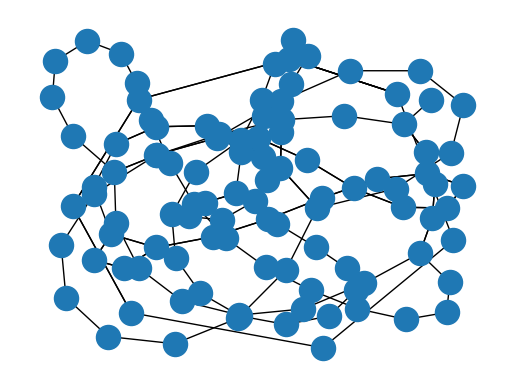

In [4]:
G = WeightedGraphWithHeuristic()

G.addNode("A1", "gray", {"A2":2,"B1":2})
G.addNode("A2",  "gray", {"A1":2,"A3":1,"B2":2})
G.addNode("A3", "white", {"A2":1,"A4":1,"B3":1})
G.addNode("A4", "gray", {"A3":1,"A5":2,"B4":2})
G.addNode("A5", "gray", {"A4":2,"A6":1,"B5":2})
G.addNode("A6", "white", {"A5":1,"A7":3,"B6":1})
G.addNode("A7", "green", {"A6":1,"A8":1,})
G.addNode("A8", "white",{"A7":3,"A9":1,"B8":1})
G.addNode("A9", "gray", {"A8":1,"A10":2,"B9":2})
G.addNode("A10", "gray", {"A9":2,"A11":2,"B10":1})
G.addNode("A11", "gray", {"A10":2,"A12":2,"B11":1})
G.addNode("A12", "gray", {"A11":2,"B12":2})


G.addNode("B1", "gray", {"A1":2,"B2":2,"C1":2})
G.addNode("B2", "gray", {"A2":2,"B1":2,"B3":1,"C2":2})
G.addNode("B3", "white", {"A3":1,"B2":1,"B4":1,"C3":1})
G.addNode("B4", "gray", {"A4":2,"B3":1,"B5":2,"C4":2})
G.addNode("B5", "gray", {"A5":2,"B4":2,"B6":1,"C5":2})
G.addNode("B6", "white", {"A6":1,"B5":2,"C6":1})
G.addNode("B7", "black", {})
G.addNode("B8", "gray", {"A8":1,"B9":2,"C8":2})
G.addNode("B9", "gray", {"A9":2,"B8":2,"B10":1,"C9":1})
G.addNode("B10", "white", {"A10":1,"B9":1,"B11":1,"C10":1})
G.addNode("B11", "white", {"A11":1,"B10":1,"B12":1,"C11":1})
G.addNode("B12", "gray", {"A12":2,"B11":1,"C12":2})


G.addNode("C1", "gray", {"B1":2,"C2":2,"D1":2})
G.addNode("C2", "gray", {"B2":2,"C1":2,"C3":1,"D2":2})
G.addNode("C3", "white", {"B3":1,"C2":1,"C4":1,"D3":1})
G.addNode("C4", "gray", {"B4":2,"C3":1,"C5":2,"D4":2})
G.addNode("C5", "gray", {"B5":2,"C4":2,"C6":1,"D5":2})
G.addNode("C6", "white", {"B6":1,"C5":1,"D6":1})
G.addNode("C7", "black", {})
G.addNode("C8", "gray", {"B8":2,"C9":1,"D8":2})
G.addNode("C9", "white", {"B9":1,"C8":1,"C10":1,"D9":1})
G.addNode("C10", "white", {"B10":1,"C9":1,"C11":1,"D10":1})
G.addNode("C11", "white", {"B11":1,"C10":1,"C12":1,"D11":1})
G.addNode("C12", "gray", {"B12":2,"C11":1,"D12":2})


G.addNode("D1", "gray", {"C1":2,"D2":2,"E1":1})
G.addNode("D2", "gray", {"C2":2,"D1":2,"D3":1,"E2":1})
G.addNode("D3", "white", {"C3":1,"D2":1,"D4":1,"E3":1})
G.addNode("D4", "gray", {"C4":2,"D3":1,"D5":2,"E4":1})
G.addNode("D5", "gray", {"C5":2,"D4":2,"D6":1,"E5":1})
G.addNode("D6", "white", {"C6":1,"D5":1,"E6":1})
G.addNode("D7", "black", {})
G.addNode("D8", "gray", {"C8":2,"D9":2,"E8":1})
G.addNode("D9", "gray", {"C9":1,"D8":2,"D10":2,"E9":1})
G.addNode("D10", "gray", {"C10":1,"D9":2,"D11":1,"E10":1})
G.addNode("D11", "white", {"C11":1,"D10":1,"D12":1,"E11":1})
G.addNode("D12", "gray", {"C12":2,"D11":1,"E12":2})

G.addNode("E1", "white", {"D1":1,"E2":1,"F1":1})
G.addNode("E2", "white", {"D2":1,"E1":1,"E3":1,"F2":1})
G.addNode("E3", "white", {"D3":1,"E2":1,"E4":1,"F3":1})
G.addNode("E4", "white", {"D4":1,"E3":1,"E5":1,"F4":1})
G.addNode("E5", "white", {"D5":1,"E4":1,"E6":1,"F5":1})
G.addNode("E6", "white", {"D6":1,"E5":1,"F6":2})
G.addNode("E7", "black", {})
G.addNode("E8", "white", {"D8":1,"E7": 100,"E9":1,"F8":2})
G.addNode("E9", "white", {"D9":1,"E8":1,"E10":1,"F9":1})
G.addNode("E10", "white", {"D10":1,"E9":1,"E11":1,"F10":1})
G.addNode("E11", "white", {"D11":1,"E10":1,"E12":1,"F11":1})
G.addNode("E12", "gray", {"D12":2,"E11":1,"F12":2})

G.addNode("F1", "gray", {"E1":1,"F2":2,"G1":2})
G.addNode("F2", "gray", {"E2":1,"F1":2,"F3":1,"G2":2})
G.addNode("F3", "white", {"E3":1,"F2":1,"F4":1,"G3":1})
G.addNode("F4", "white", {"E4":1,"F3":1,"F5":1,"G4":1})
G.addNode("F5", "dblue", {"E5":1,"F4":1,"F6":1,"G5":1})
G.addNode("F6", "lblue", {"E6":2,"F5":1,"F7":1,"G6":2})
G.addNode("F7", "lblue", {"F6":1,"F8":1,})
G.addNode("F8", "lblue", {"E8":2,"F7":1,"F9":1,"G8":2})
G.addNode("F9", "dblue", {"E9":1,"F8":1,"F10":1,"G9":1})
G.addNode("F10", "white", {"E10":1,"F9":1,"F11":1,"G10":1})
G.addNode("F11", "white", {"E11":1,"F10":1,"F12":1,"G11":1})
G.addNode("F12", "gray", {"E12":2,"F11":1,"G12":2})

G.addNode("G1", "gray", {"F1":2,"G2":2,"H1":2})
G.addNode("G2", "gray", {"F2":2,"G1":2,"G3":1,"H2":2})
G.addNode("G3", "white", {"F3":1,"G2":1,"G4":1,"H3":1})
G.addNode("G4", "white", {"F4":1,"G3":1,"G5":1,"H4":1})
G.addNode("G5", "white", {"F5":1,"G4":1,"G6":1,"H5":1})
G.addNode("G6", "white", {"F6":2,"G5":1,"H6":1})
G.addNode("G7", "black", {})
G.addNode("G8", "white", {"F8":2,"G9":1,"H8":1})
G.addNode("G9", "white", {"F9":1,"G8":1,"G10":1,"H9":1})
G.addNode("G10", "white", {"F10":1,"G9":1,"G11":1,"H10":1})
G.addNode("G11", "white", {"F11":1,"G10":1,"G12":1,"H11":1})
G.addNode("G12", "gray", {"F12":2,"G11":1,"H12":2})

G.addNode("H1", "gray", {"G1":2,"H2":2,"I1":2})
G.addNode("H2", "gray",  {"G2":2,"H1":2,"H3":1,"I2":2})
G.addNode("H3", "white", {"G3":1,"H2":1,"H4":1,"I3":1})
G.addNode("H4", "gray", {"G4":1,"H3":1,"H5":2,"I4":2})
G.addNode("H5", "gray", {"G5":1,"H4":2,"H6":1,"I5":2})
G.addNode("H6", "white", {"G6":1,"H5":1,"I6":1})
G.addNode("H7", "black", {})
G.addNode("H8", "white", {"G8":1,"H9":1,"I8":1})
G.addNode("H9", "white", {"G9":1,"H8":1,"H10":1,"I9":1})
G.addNode("H10", "gray", {"G10":1,"H9":1,"H11":1,"I10":2})
G.addNode("H11", "white", {"G11":1,"H10":1,"H12":1,"I11":1})
G.addNode("H12", "gray", {"G12":2,"H11":1,"I12":2})

G.addNode("I1", "gray", {"H1":2,"I2":2,"J1":1})
G.addNode("I2", "gray", {"H2":2,"I1":2,"I3":1,"J2":1})
G.addNode("I3", "white", {"H3":1,"I2":1,"I4":1,"J3":1})
G.addNode("I4", "gray", {"H4":2,"I3":1,"I5":2,"J4":2})
G.addNode("I5", "gray", {"H5":2,"I4":2,"I6":1,"J5":2})
G.addNode("I6", "white", {"H6":1,"I5":1,"J6":1})
G.addNode("I7", "black", {})
G.addNode("I8", "white", {"H8":1,"I9":1,"J8":1})
G.addNode("I9", "white", {"H9":1,"I8":1,"I10":1,"J9":1})
G.addNode("I10", "gray", {"H10":2,"I9":1,"I11":1,"J10":2})
G.addNode("I11", "white", {"H11":1,"I10":1,"I12":1,"J11":1})
G.addNode("I12", "gray", {"H12":2,"I11":1,"J12":2})

G.addNode("J1", "white", {"I1":1,"J2":1,"K1":1})
G.addNode("J2", "white", {"I2":1,"J1":1,"J3":1,"K2":1})
G.addNode("J3", "white", {"I3":1,"J2":1,"J4":1,"K3":1})
G.addNode("J4", "gray", {"I4":2,"J3":1,"J5":2,"K4":2})
G.addNode("J5", "gray", {"I5":2,"J4":2,"J6":1,"K5":2})
G.addNode("J6", "white", {"I6":1,"J5":1,"K6":1})
G.addNode("J7", "black", {})
G.addNode("J8", "white", {"I8":1,"J9":1,"K8":1})
G.addNode("J9", "white", {"I9":1,"J8":1,"J10":2,"K9":2})
G.addNode("J10", "gray", {"I10":2,"J9":2,"J11":1,"K10":1})
G.addNode("J11", "white", {"I11":1,"J10":1,"J12":1,"K11":1})
G.addNode("J12", "gray", {"I12":2,"J11":1,"K12":2})

G.addNode("K1", "red", {"J1":1,"K2":1,"L1":1})
G.addNode("K2", "red", {"J2":1,"K1":1,"K3":1,"L2":1})
G.addNode("K3", "white", {"J3":1,"K2":1,"K4":1,"L3":1})
G.addNode("K4", "gray", {"J4":2,"K3":1,"K5":2,"L4":1})
G.addNode("K5", "gray", {"J5":2,"K4":2,"K6":1,"L5":1})
G.addNode("K6", "white", {"J6":1,"K5":1,"L6":1})
G.addNode("K7", "black", {})
G.addNode("K8", "white", {"J8":1,"K9":1,"L8":1})
G.addNode("K9", "gray", {"J9":2,"K8":1,"K10":1,"L9":2})
G.addNode("K10", "white", {"J10":1,"K9":1,"K11":1,"L10":1})
G.addNode("K11", "white", {"J11":1,"K10":1,"K12":1,"L11":1})
G.addNode("K12", "gray", {"J12":2,"K11":1,"L12":2})

G.addNode("L1", "red", {"K1":1,"L2":1})
G.addNode("L2", "red", {"K2":1,"L1":1,"L3":1})
G.addNode("L3", "white", {"K3":1,"L2":1,"L4":1})
G.addNode("L4", "white", {"K4":1,"L3":1,"L5":1})
G.addNode("L5", "white", {"K5":1,"L4":1,"L6":1})
G.addNode("L6", "white", {"K6":1,"L5":1,"L7":3})
G.addNode("L7", "green", {"L6":1,"L8":1})
G.addNode("L8", "white", {"K8":1,"L7":3,"L9":1})
G.addNode("L9", "gray", {"K9":2,"L8":1,"L10":2})
G.addNode("L10", "gray", {"K10":1,"L9":2,"L11":2})
G.addNode("L11", "gray", {"K11":1,"L10":2,"L12":2})
G.addNode("L12", "gray", {"K12":2,"L11":2})

search = AStarBestFirstSearch()
route = ["K2", "B9", "D9", "K1"]
G.plotWeightedGraphWithHeuristic(search.greedyAStarSearch(G, route))

search = AStarBestFirstSearch()
route = ["K1", "H1", "H1", "L2"]
G.plotWeightedGraphWithHeuristic(search.greedyAStarSearch(G, route))

search = AStarBestFirstSearch()
route = ["L2", "J5", "H10", "K2"]
G.plotWeightedGraphWithHeuristic(search.greedyAStarSearch(G, route))

search = AStarBestFirstSearch()
route = ["L1", "I1", "H5", "K1"]
G.plotWeightedGraphWithHeuristic(search.greedyAStarSearch(G, route))

search = AStarBestFirstSearch()
route = ["K2", "D9", "A4", "L1"]
G.plotWeightedGraphWithHeuristic(search.greedyAStarSearch(G, route))